Import Libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Load and Explore Data

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [6]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [13]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

<Axes: xlabel='Exited', ylabel='count'>

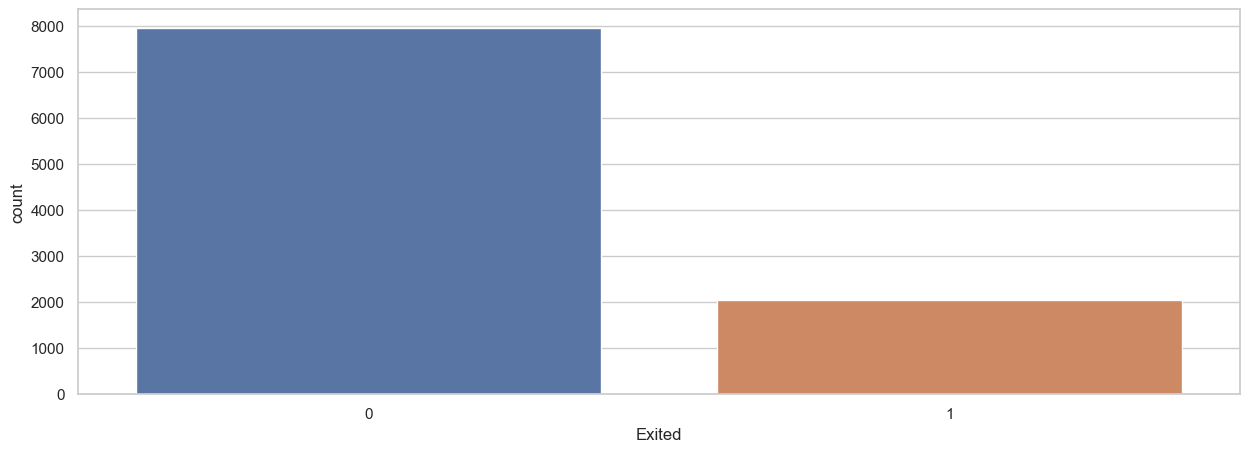

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='Exited')

In [16]:
data['Exited'].value_counts().to_frame()

,count
Exited,
0,7963
1,2037


In [17]:
from sklearn.utils import resample

In [18]:
churn_majority=data[data['Exited']==0]
churn_minority=data[data['Exited']==1]

In [19]:
churn_majority_downsample=resample(churn_majority,n_samples=2037,replace=False,random_state=42)

In [20]:
churn_df=pd.concat([churn_majority_downsample,churn_minority])

In [21]:
churn_df['Exited'].value_counts().to_frame()

,count
Exited,
0,2037
1,2037


<Axes: xlabel='Exited', ylabel='count'>

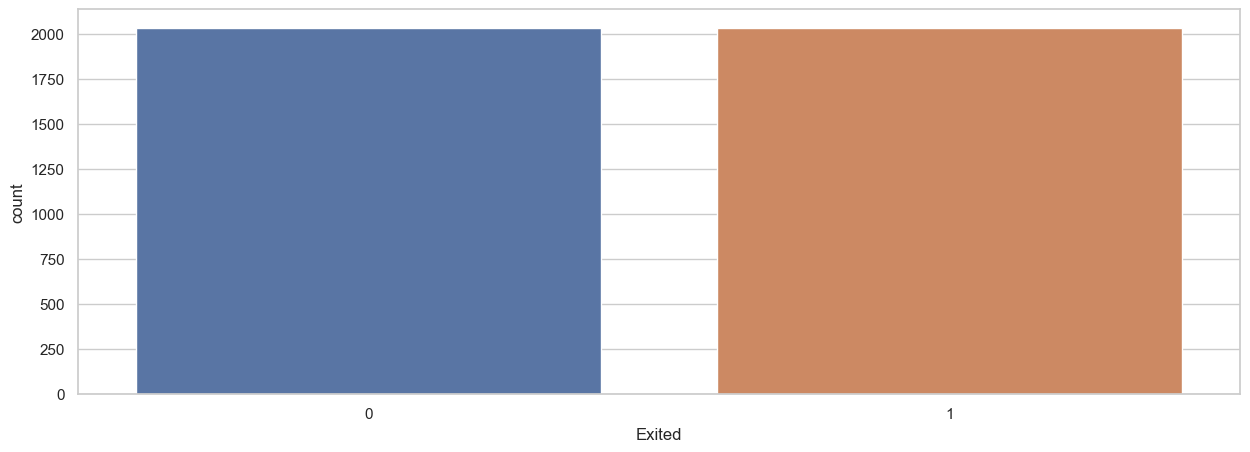

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn_df,x='Exited')

In [23]:
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [27]:
churn_df.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender'], axis=1, inplace=True)

In [28]:
churn_df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
Age,-0.019635,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
Tenure,0.019156,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
Balance,0.022088,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
NumOfProducts,0.007916,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
HasCrCard,0.002756,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
IsActiveMember,0.012992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
EstimatedSalary,-0.010973,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173
Exited,-0.034660,0.343870,-0.016491,0.146820,-0.054669,-0.017800,-0.201877,0.006173,1.000000


<Axes: >

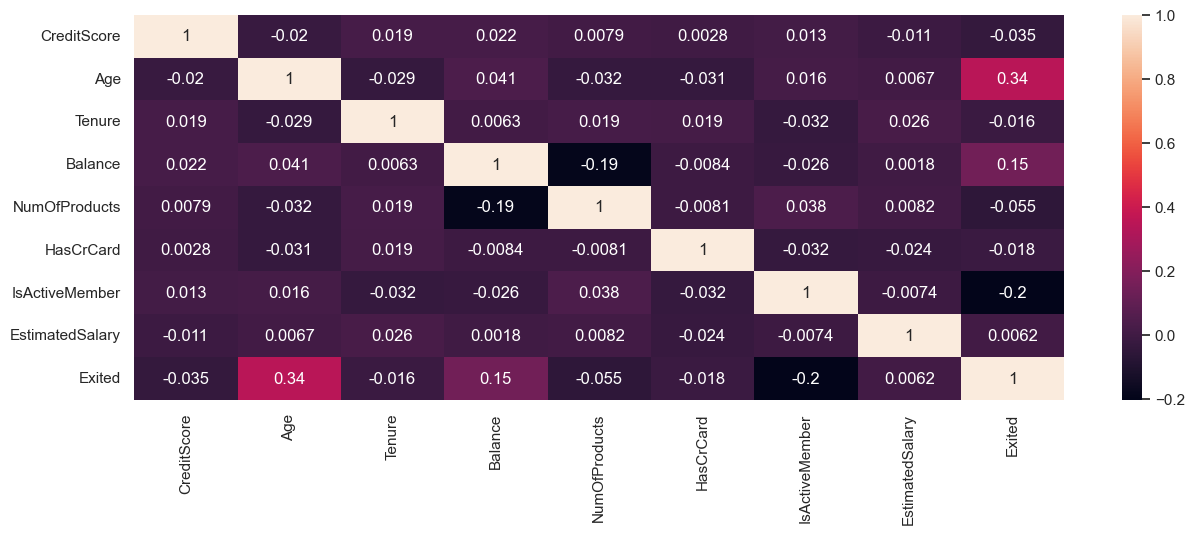

In [29]:
plt.figure(figsize=(15,5))
sns.heatmap(churn_df.corr(),annot=True)

In [30]:
df_corr_exit=churn_df.corr()['Exited'].to_frame()

<Axes: ylabel='Exited'>

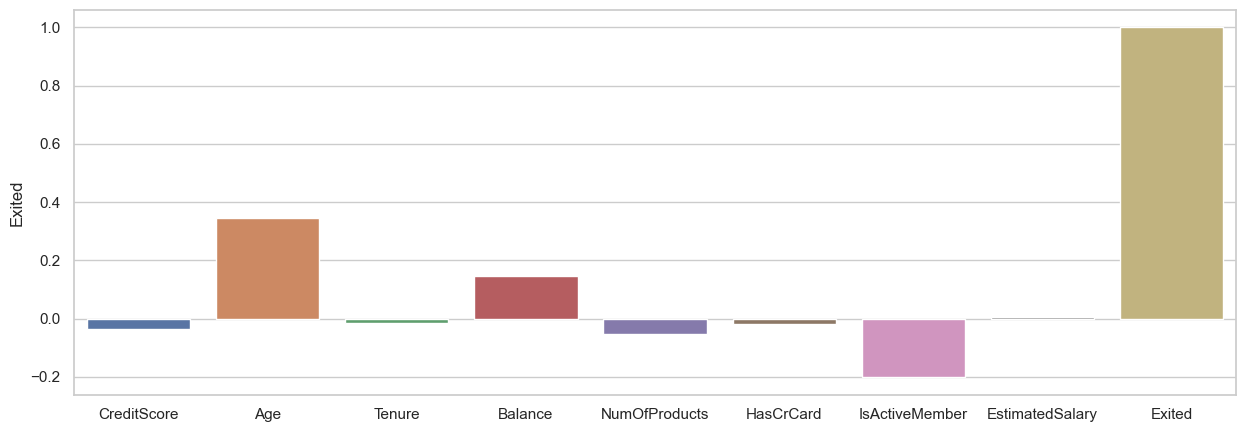

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='Exited')

Data Preprocessing

In [32]:
# Drop irrelevant columns (e.g., RowNumber, CustomerId, Surname)
df = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Handle categorical variables (Geography and Gender) using one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into features (X) and the target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Selection and Training

In [33]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Model Evaluation

In [34]:
# Make predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Evaluate model performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))

Logistic Regression:
Accuracy: 0.811
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1543   64]
 [ 314   79]]

Random Forest:
Accuracy: 0.8665
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:
 [[1550   57]
 [ 210  183]]

Gradient Boosting:
Accuracy: 0.8675
Classification Report:
               precision    recall  f1-score   support

           0       0

In [37]:
lr_model.score(X_train,y_train)

0.811375

Model Interpretation

In [35]:
# Logistic Regression Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

              Feature  Coefficient
1                 Age     0.754242
8   Geography_Germany     0.337658
3             Balance     0.160789
9     Geography_Spain     0.039323
7     EstimatedSalary     0.015749
5           HasCrCard    -0.010264
2              Tenure    -0.042680
4       NumOfProducts    -0.060611
0         CreditScore    -0.067687
10        Gender_Male    -0.264762
6      IsActiveMember    -0.533316


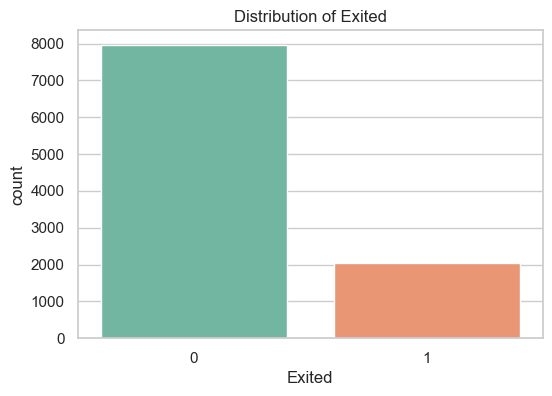

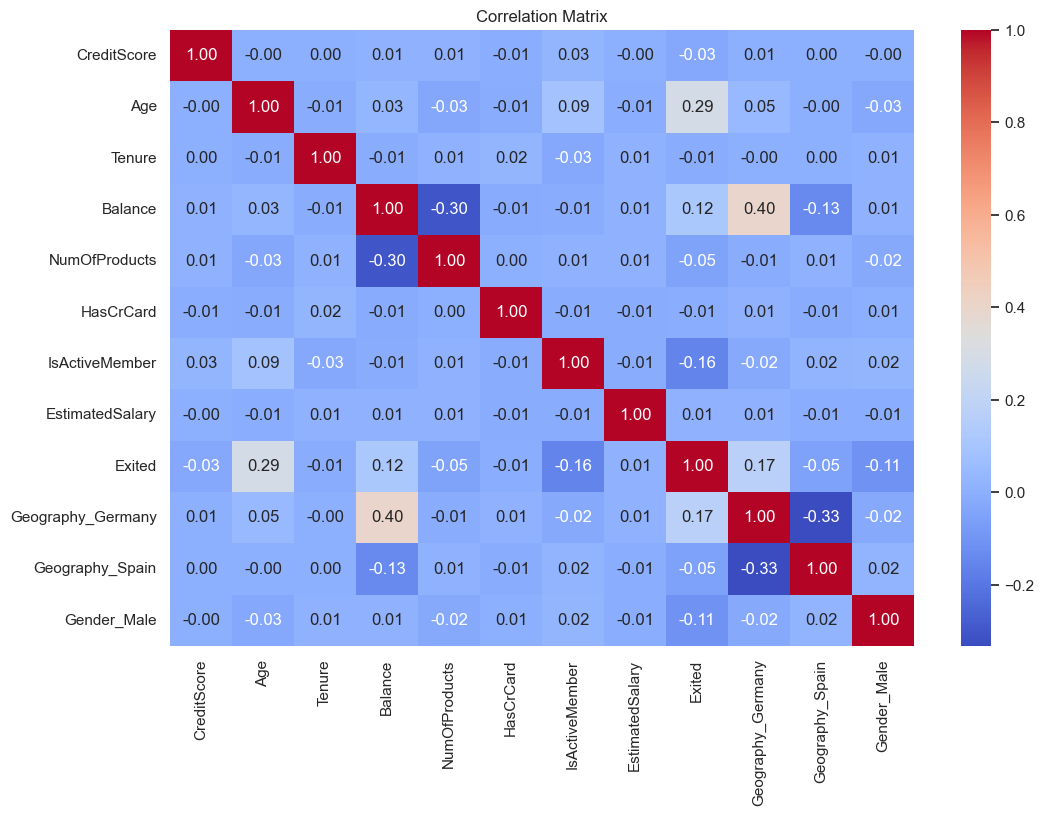

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


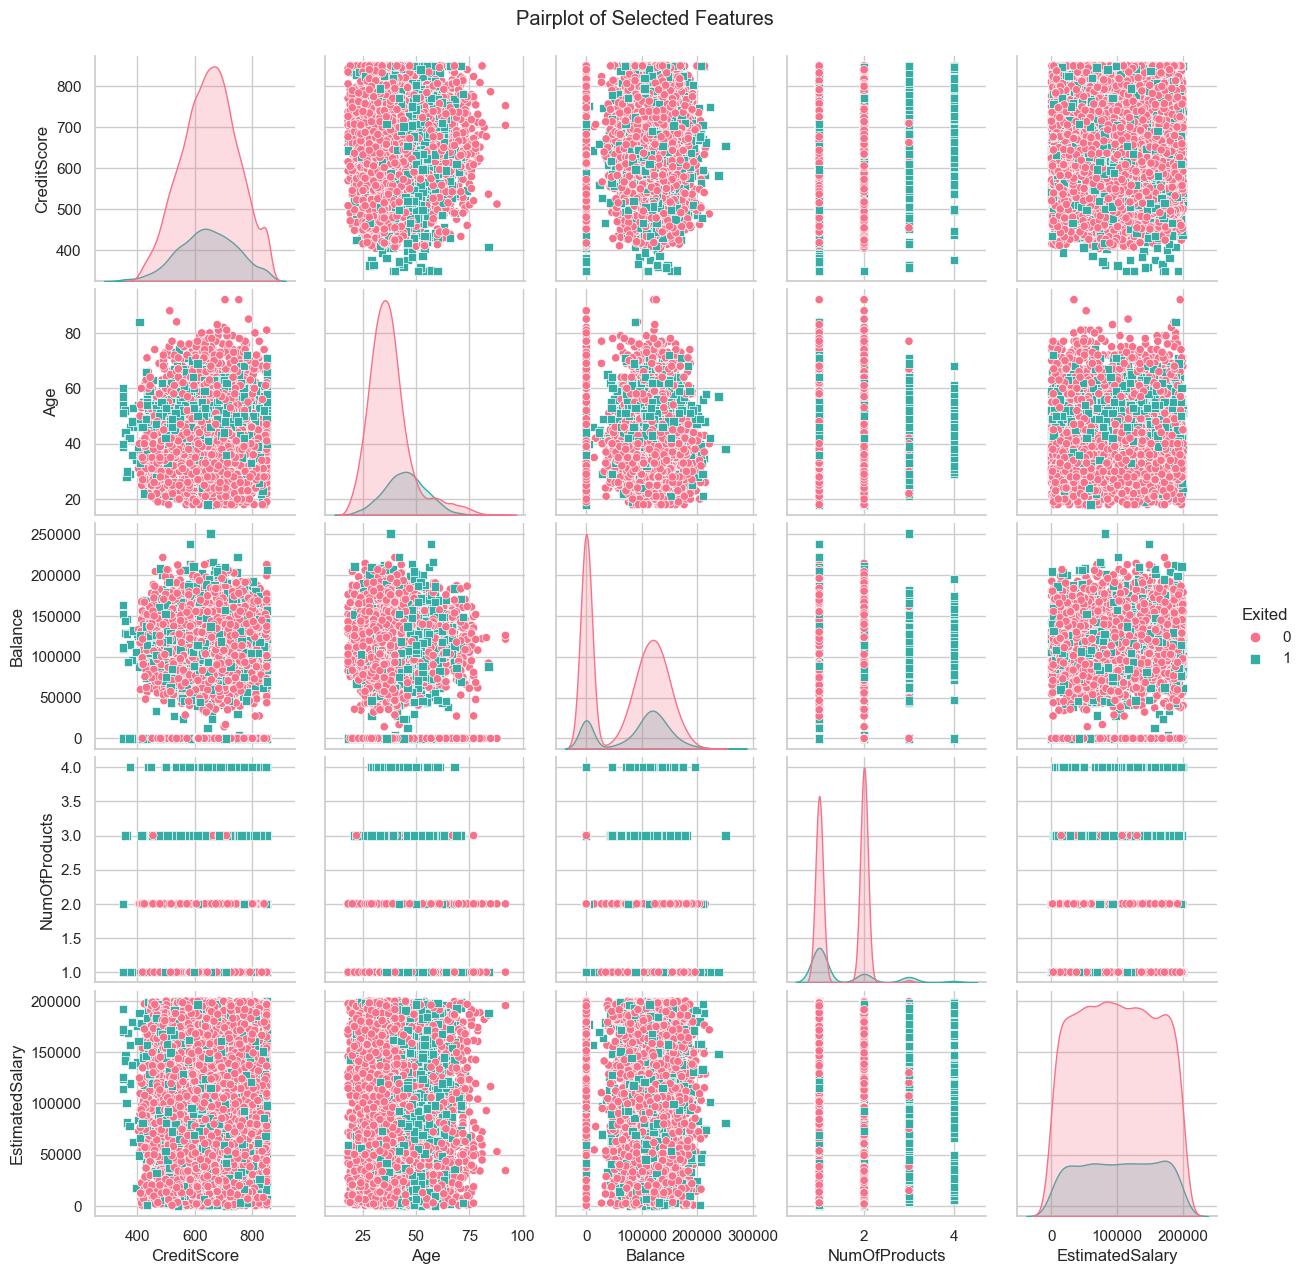

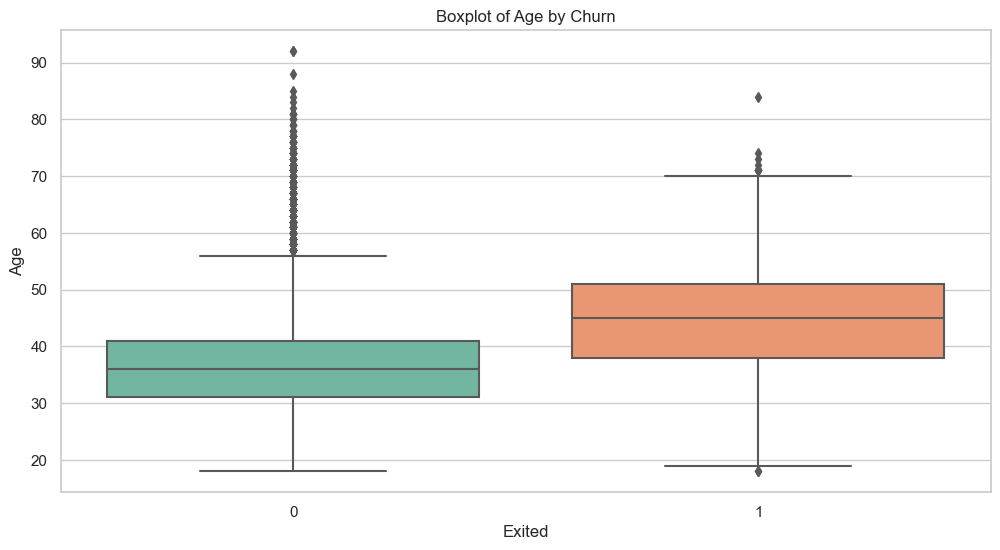

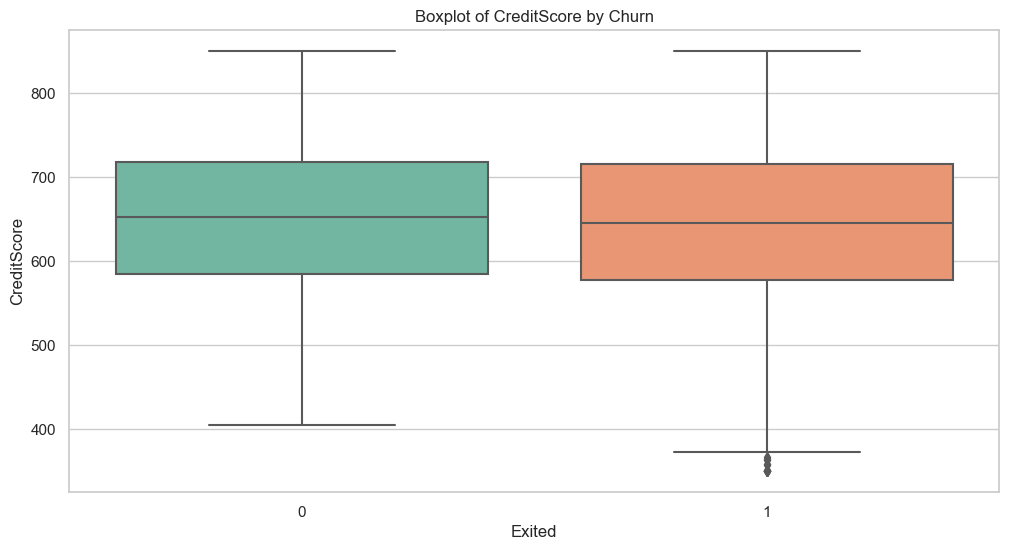

In [36]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Distribution of the target variable (Exited)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Distribution of Exited')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
selected_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
sns.pairplot(df, vars=selected_features, hue='Exited', palette='husl', markers=['o', 's'])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Boxplot for Age and CreditScore
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='Age', data=df, palette='Set2')
plt.title('Boxplot of Age by Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df, palette='Set2')
plt.title('Boxplot of CreditScore by Churn')
plt.show()
